<a href="https://colab.research.google.com/github/khanhlam16/Bai-tap-nhan-dien/blob/main/nhan_dien_khuon_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Le Khanh Lam/khuon mat/train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 158 images belonging to 3 classes.


In [7]:
val_set = val_datagen.flow_from_directory('/content/drive/My Drive/Le Khanh Lam/khuon mat/validation', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 16 images belonging to 3 classes.


In [8]:
training_set.class_indices

{'hau': 0, 'lam': 1, 'trang': 2}

In [9]:
val_set.class_indices

{'hau': 0, 'lam': 1, 'trang': 2}

In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape=(224,224,3))) 
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=val_set)

Epoch 1/100
5/5 [==============================] - 50s 7s/step - loss: 1.1571 - accuracy: 0.4620 - val_loss: 0.7988 - val_accuracy: 0.9375
Epoch 2/100
5/5 [==============================] - 8s 2s/step - loss: 0.3963 - accuracy: 0.9430 - val_loss: 0.6332 - val_accuracy: 0.7500
Epoch 3/100
5/5 [==============================] - 8s 2s/step - loss: 0.1857 - accuracy: 0.9114 - val_loss: 9.2387e-07 - val_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 9s 2s/step - loss: 9.8006e-06 - accuracy: 1.0000 - val_loss: 1.6764e-06 - val_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 8s 2s/step - loss: 1.3010e-04 - accuracy: 1.0000 - val_loss: 3.7625e-06 - val_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 8s 2s/step - loss: 2.7289e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 8s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.00

In [13]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

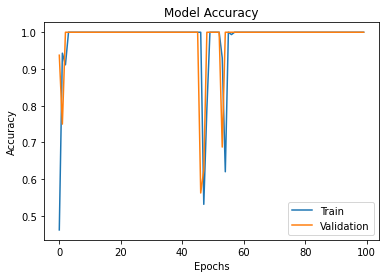

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [15]:
model.save("khuon mat.h5")

In [16]:
model_face=load_model('khuon mat.h5')

1/1 [==============================] - 0s 357ms/step
Đây là Quốc Hậu


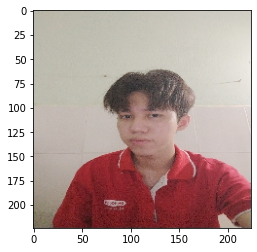

1/1 [==============================] - 0s 37ms/step
Đây là Thùy Trang


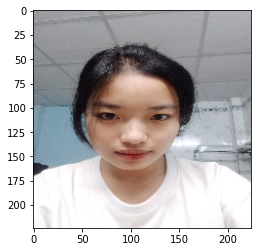

1/1 [==============================] - 0s 28ms/step
Đây là Khánh Lâm


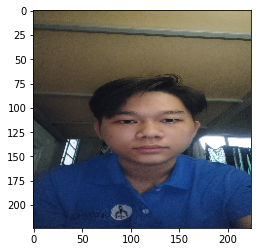

In [17]:
import os
test = '/content/drive/My Drive/Le Khanh Lam/khuon mat/test/test1'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(224,224))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_face.predict(img)
  if round(result[0][0])==1:
    prediction='Đây là Quốc Hậu'
  if round(result[0][1])==1:
    prediction = 'Đây là Khánh Lâm'
  if round(result[0][2])==1:
    prediction='Đây là Thùy Trang'
  
  print(prediction)
  plt.show()